# Worksheet

## R^2 demo

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 1. Dataset
x = np.array([1, 2, 3])
y = np.array([2, 3, 4])
data = pd.DataFrame({'x': x, 'y': y})

# 2. Model A: With intercept
X_with_intercept = sm.add_constant(data['x'])  # adds a column of ones
model_with_intercept = sm.OLS(data['y'], X_with_intercept).fit()

# 3. Model B: Without intercept
X_no_intercept = data[['x']]  # no constant
model_no_intercept = sm.OLS(data['y'], X_no_intercept).fit()


yhat_with = model_with_intercept.fittedvalues
yhat_no = model_no_intercept.fittedvalues

r2_with_residual = model_with_intercept.rsquared
r2_no_residual = model_no_intercept.rsquared

# 5. Variance-based R²
def variance_r2(y_true, y_pred):
    return np.var(y_pred, ddof=0) / np.var(y_true, ddof=0)

r2_with_variance = variance_r2(y, yhat_with)
r2_no_variance = variance_r2(y, yhat_no)

# 6. Print results
print("Model WITH intercept:")
print(f"  R² (residual-based): {r2_with_residual:.4f}")
print(f"  R² (variance-based): {r2_with_variance:.4f}")

print("\nModel WITHOUT intercept:")
print(f"  R² (residual-based): {r2_no_residual:.4f}")
print(f"  R² (variance-based): {r2_no_variance:.4f}")

# 4. Show summaries
print("Model A: With Intercept")
print(model_with_intercept.summary())
print("\nModel B: No Intercept")
print(model_no_intercept.summary())


Model WITH intercept:
  R² (residual-based): 1.0000
  R² (variance-based): 1.0000

Model WITHOUT intercept:
  R² (residual-based): 0.9852
  R² (variance-based): 2.0408
Model A: With Intercept
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.932e+30
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           4.58e-16
Time:                        09:07:19   Log-Likelihood:                 100.96
No. Observations:                   3   AIC:                            -197.9
Df Residuals:                       1   BIC:                            -199.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 c

/Users/lance/Documents/BostonUniversity/CURRENT-SEMESTER/CS506-Spring2025/lecture_18/env/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/Users/lance/Documents/BostonUniversity/CURRENT-SEMESTER/CS506-Spring2025/lecture_18/env/lib/python3.13/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Simulate and Count

What is the probability that a fair coin generated this sequence of coin tosses.

Dataset of coin tosses:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Probability that a fair coin generates it:  8.999999999999986e-09

We simulated a fair coin being flipped 10 times.
In our 1000 simulations, this was the count of the number of Heads (out of 6) we observed: 


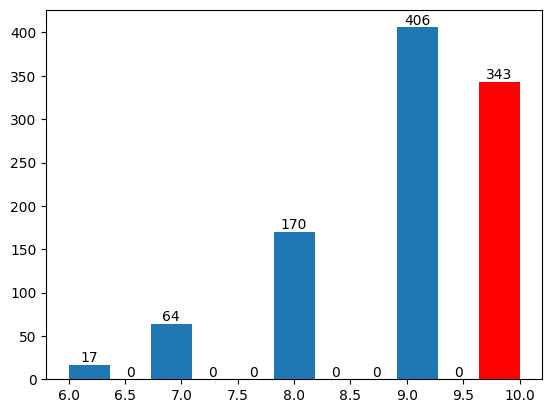

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

def num_successes(flips):
    return sum(flips)

SAMPLE_SIZE = 10
og_flips = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
print("Dataset of coin tosses: ", og_flips)
print("Probability that a fair coin generates it: ", binom.pmf(num_successes(og_flips), SAMPLE_SIZE, .9))
print()

p_est = []
NUM_SIMULATIONS = 1000

print("We simulated a fair coin being flipped "
      + str(SAMPLE_SIZE)
      + " times.\nIn our "
      + str(NUM_SIMULATIONS)
      + " simulations, this was the count of the number of Heads (out of 6) we observed: "
    )

for _ in range(NUM_SIMULATIONS):
    flips = [np.random.choice([0, 1], p=[.1, .9]) for _ in range(SAMPLE_SIZE)]
    p_est.append(num_successes(flips))

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([num_successes(og_flips)], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()


In Linear Regression, our most pressing question is whether there is in fact a true relationship between our predictors `X` and our target `y` - or if the relationship we observed was just a fluke.

Through simulations and counting, let's see just how likely or unlikely it is to observe linear relationships in data that was generated by an `X` and `y` that are not linearly related.

True beta =  [0 0]
Observed beta =  [0.20356405 9.10325356]


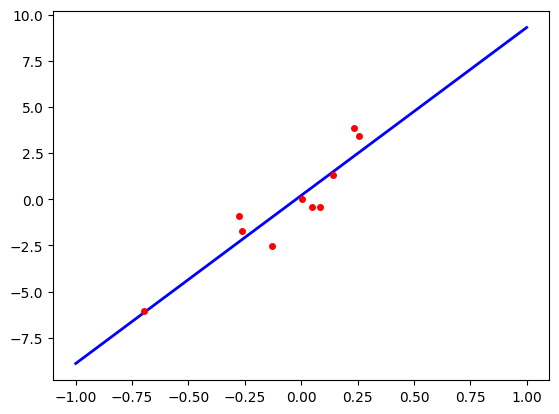

In [15]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10
np.random.seed(94290)

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = 5.0 * xlin + np.random.randn(SAMPLE_SIZE) # beta = 0 means there is no relationship between x and y.

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
observed_beta = np.linalg.inv(X.T @ X) @ X.T @ y

print("True beta = ", np.array([0, 0]))
print("Observed beta = ", observed_beta)

xplot = np.linspace(-1,1,20)
yestplot = observed_beta[0] + observed_beta[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

Lets see what happens if we repeat this 1000 times and record the estimated intercept and slope each time to plot them in a histogram.

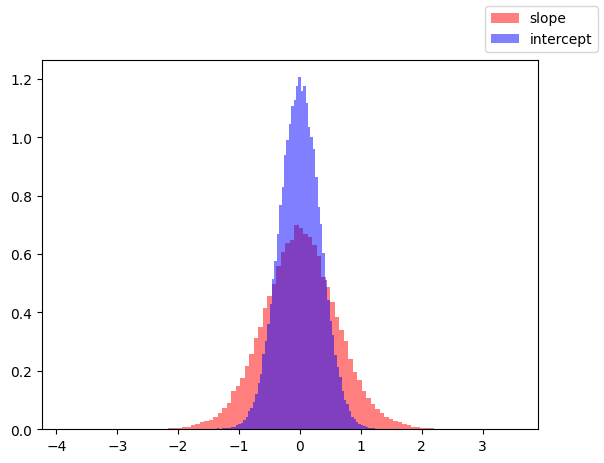

In [16]:
NUM_TRIALS = 100000
np.random.seed(None)
inter = []
slope = []

for _ in range(NUM_TRIALS):

    xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    inter.append(beta[0])
    slope.append(beta[1])

fig, ax = plt.subplots()
ax.hist(slope, bins=100, density=True, color='r', alpha=.5, label="slope")
ax.hist(inter, bins=100, density=True, color='b', alpha=.5, label="intercept")
fig.legend()
plt.show()

In [17]:
# Calculate empirical probabilities from previous bootstraps/simulations
prob_inter = np.mean(np.array(inter) > observed_beta[0])
prob_slope = np.mean(np.array(slope) > observed_beta[1])

print(f"Probability of intercept > {observed_beta[0]:.8f}: {prob_inter:.6f}")
print(f"Probability of slope > {observed_beta[1]:.8f}: {prob_slope:.6f}")

Probability of intercept > 0.20356405: 0.272740
Probability of slope > 9.10325356: 0.000000


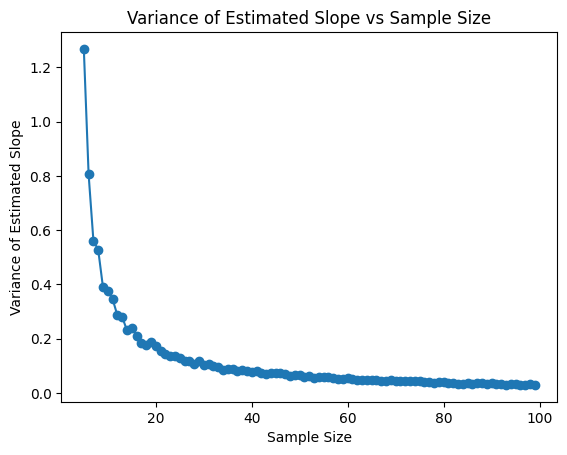

In [21]:
sample_sizes = np.arange(5, 100, 1)
beta_var = []
NUM_TRIALS = 1000
images = []

from PIL import Image as im

def snap(slope, inter):
    fig, ax = plt.subplots()
    ax.hist(slope, bins=100, density=True, color='r', alpha=.5, label="slope")
    ax.hist(inter, bins=100, density=True, color='b', alpha=.5, label="intercept")
    fig.legend()
    ax.set_xlim([-4, 4])
    ax.set_title('SAMPLE SIZE = ' + str(SAMPLE_SIZE))
    fig.savefig('temp.png')
    plt.close()
    return im.fromarray(np.asarray(im.open('temp.png')))

for SAMPLE_SIZE in sample_sizes:
    beta_intercept = []
    beta_slope = []
    for _ in range(NUM_TRIALS):
        xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
        y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)

        intercept = np.ones(np.shape(xlin)[0])
        X = np.array([intercept, xlin]).T
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        beta_slope.append(beta[1])
        beta_intercept.append(beta[0])
    images.append(snap(beta_slope, beta_intercept))
    beta_var.append(np.var(beta_slope))


images[0].save(
        'change_in_sample_size.gif',
        optimize=False,
        save_all=True,
        append_images=images[1:],
        loop=0,
        duration=200,
    )

plt.plot(sample_sizes, beta_var, marker='o')
plt.xlabel("Sample Size")
plt.ylabel("Variance of Estimated Slope")
plt.title("Variance of Estimated Slope vs Sample Size")
plt.show()


In [42]:
SAMPLE_SIZE = 50
NUM_TRIALS = 500

results = {}

for scale in [1, 10, 100]:
    beta_slope = []
    beta_intercept = []
    for _ in range(NUM_TRIALS):
        xlin = -scale + 2 * scale * np.random.random(SAMPLE_SIZE)
        y = 0.0 * xlin + np.random.randn(SAMPLE_SIZE)
        intercept = np.ones(np.shape(xlin)[0])
        X = np.array([intercept, xlin]).T
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        beta_slope.append(beta[1])
        beta_intercept.append(beta[0])
    results[scale] = {
        'slope_var': np.var(beta_slope),
        'intercept_var': np.var(beta_intercept)
    }

print("x scale = 1")
print("  Variance of estimated slope:     {:.6f}".format(results[1]['slope_var']))
print("  Variance of estimated intercept: {:.6f}".format(results[1]['intercept_var']))
print()
print("x scale = 10")
print("  Variance of estimated slope:     {:.6f}".format(results[10]['slope_var']))
print("  Variance of estimated intercept: {:.6f}".format(results[10]['intercept_var']))
print()
print("x scale = 100")
print("  Variance of estimated slope:     {:.6f}".format(results[100]['slope_var']))
print("  Variance of estimated intercept: {:.6f}".format(results[100]['intercept_var']))
print()



x scale = 1
  Variance of estimated slope:     0.064849
  Variance of estimated intercept: 0.020005

x scale = 10
  Variance of estimated slope:     0.000592
  Variance of estimated intercept: 0.020269

x scale = 100
  Variance of estimated slope:     0.000007
  Variance of estimated intercept: 0.019202



## Computing Probabilities

So clearly the magnitude of the features matters. And this comes out in the math:

We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

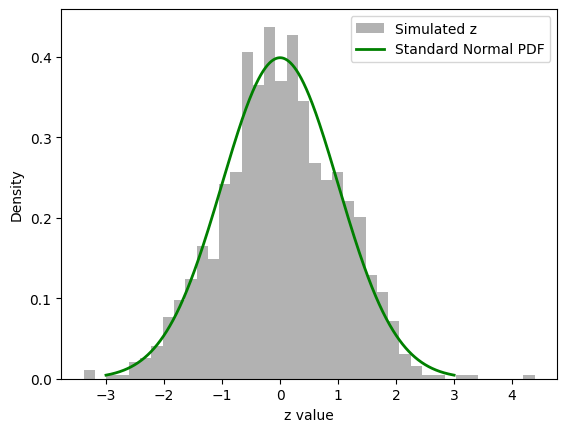

In [41]:
from scipy.stats import norm
SAMPLE_SIZE = 100

beta_hist = []
scale = 1
for _ in range(1000):
    x = -scale + 2 * scale * np.random.random(SAMPLE_SIZE)
    y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    z = beta_hat[1]/np.sqrt((np.linalg.inv(X.T @ X))[1,1])
    beta_hist.append(z)

xs = np.linspace(-3, 3, 1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=40, density=True, alpha=0.6, color='gray', label='Simulated z')
ax.plot(xs, norm.pdf(xs, 0, 1), color='green', linewidth=2, label='Standard Normal PDF')
ax.set_xlabel('z value')
ax.set_ylabel('Density')
ax.legend()
plt.show()

While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice we use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (the intercept counts as one such parameter). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Below we can see this is the case through a simulation:

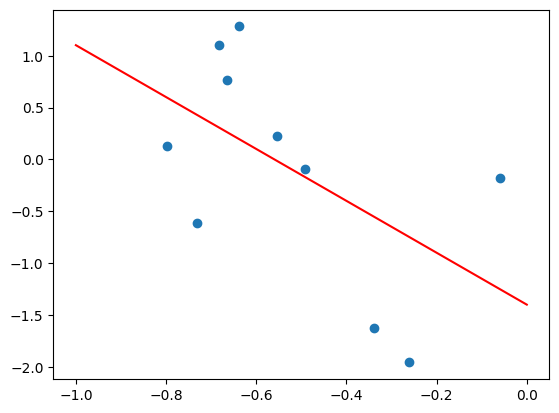

In [ ]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

x = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
xs = np.linspace(-1, 0, 100)

plt.scatter(x, y)
plt.plot(xs, beta_hat[0] + beta_hat[1] * xs, c='r')
plt.show()

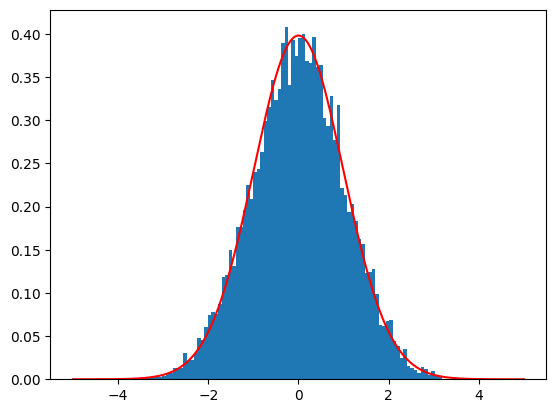

In [44]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

def standard_error(ytrue, ypred):
    return (sum((ytrue - ypred)**2) / (len(ytrue) - 2)) ** (1/2)

def normalized(beta, mu, sig, skk):
    return (beta - mu) / (((sig ** 2) * skk) ** (1/2))

SAMPLE_SIZE = 100
TRIALS = 10000

beta_hist = []
for _ in range(TRIALS):
    x = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    skk = np.linalg.inv(X.T @ X)[1][1]
    s = standard_error(y, X @ beta)
    beta_hist.append(normalized(beta[1], 0, s, skk))

xs = np.linspace(-5,5,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

The probability that normalized $\hat\beta$ is less than 0 can be found by evaluating the CDF of the t-distribution above. This clearly evaluates to .5.

a) What is the probability that normalized $\hat\beta$ is less than -2?

In [45]:
print(t.cdf(-4, SAMPLE_SIZE -2))

6.149868886703752e-05


b) Still assuming that there is no relationship between X and Y. What value would the normalized $\hat\beta$ only be less than ~1% of the time? Another way to phrase this is: what value would the normalized $\hat\beta$ be greater than 99% of the time? i.e.

$$\int_{-\infty}^{x} t_{pdf}(t)dt = .01 $$

In [ ]:
from scipy.stats import norm

def search(alpha, df):
    d = 4
    epsilon = .001
    delta = 1 * 10 ** (-d)
    i = -5
    while i < 5:
        i += epsilon
        val = t.cdf(i, df) # alternative to math is to simulate this every time...
        if abs(alpha - val) < delta:
            return round(i, ndigits=d-2)
    ValueError("couldn't find anything")

t_alpha = search(.01, SAMPLE_SIZE - 2)
print(t_alpha)
print(t.cdf(t_alpha, SAMPLE_SIZE - 2))

-2.37
0.009873264817099584


c) What value of $\hat\beta$ does the above translate to? i.e. what value would $\hat\beta$ only be less than 1% of the time (assuming there is no relationship between X and Y)?

In [ ]:
skk = np.linalg.inv(X.T @ X)[1][1]
s = standard_error(y, X @ beta)
t_alpha = search(.01, SAMPLE_SIZE - 2)
beta_hat = t_alpha * ((s ** 2) * skk) ** (1/2)

print(t_alpha)
print(beta_hat)
print(t.cdf(normalized(beta_hat, 0, s, skk), SAMPLE_SIZE - 2))

-2.37
-0.9299024849847981
0.009873264817099584


d) So what range of values [-t, t] is expected to hold $\hat\beta$ ~98% of the time?

e) Verify this by running a simulation where you fix the interval and record the number of times in a given number of TRIALS that $\hat\beta$ falls in the interval.

In [ ]:
interval_min = -0.9299024849847981
interval_max = 0.9299024849847981

TRIALS = 10000
SAMPLE_SIZE = 100

count = 0
for _ in range(TRIALS):
    x = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = 0.0 * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x]).T
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    if beta[1] > interval_min and beta[1] < interval_max :
        count += 1

print(count / TRIALS)

0.9916


f) For the dataset below, report the 99% confidence interval around the estimate of the slope

In [ ]:
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_hat)

skk = np.linalg.inv(X.T @ X)[1][1]
s = standard_error(y, X @ beta)
t_alpha = search(.2, len(x) - 2)

print("60% CI around the slope is: [", beta_hat[1] + t_alpha * ((s ** 2) * skk) ** (1/2) , ", ", beta_hat[1] - t_alpha * ((s ** 2) * skk) ** (1/2) ,"]")


[0.50155603 1.19902827]
60% CI around the slope is: [ -0.4639483573379881 ,  2.862004901319229 ]


g) Based on this confidence interval, what can you deduce about the relationship between x and y?

### Confidence Intervals

Let's start by constructing a 50% confidence interval around the estimated true mean age of a population where age follows a normal distribution with mean 50 and standard deviation 10.

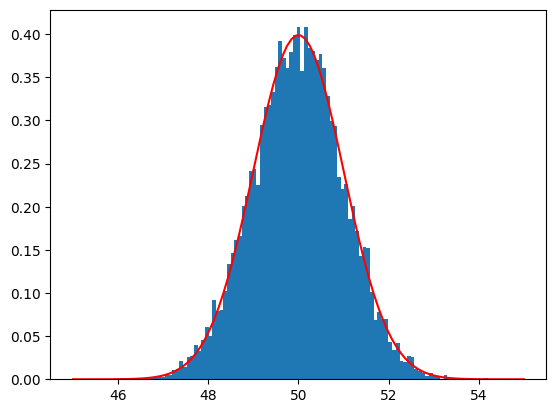

In [46]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

true_mean_age = 50
true_stdev_age = 10
SAMPLE_SIZE = 100
TRIALS = 10000

mean_hist = []
for _ in range(TRIALS):
    sample_ages = true_mean_age + np.random.randn(SAMPLE_SIZE) * true_stdev_age
    mean_hist.append(np.mean(sample_ages))

xs = np.linspace(45,55,100)
fig, ax = plt.subplots()
ax.hist(mean_hist, bins=100, density=True)
ax.plot(xs, norm.pdf(xs, true_mean_age, true_stdev_age / (SAMPLE_SIZE ** (1/2))), color='red')
plt.show()

We want to define a process that, given a confidence level (say 95%) creates an interval around the sample mean (our estimate of the true mean) where if the process is repeated many times 95% of these intervals contain the true mean.

4.100000000000001


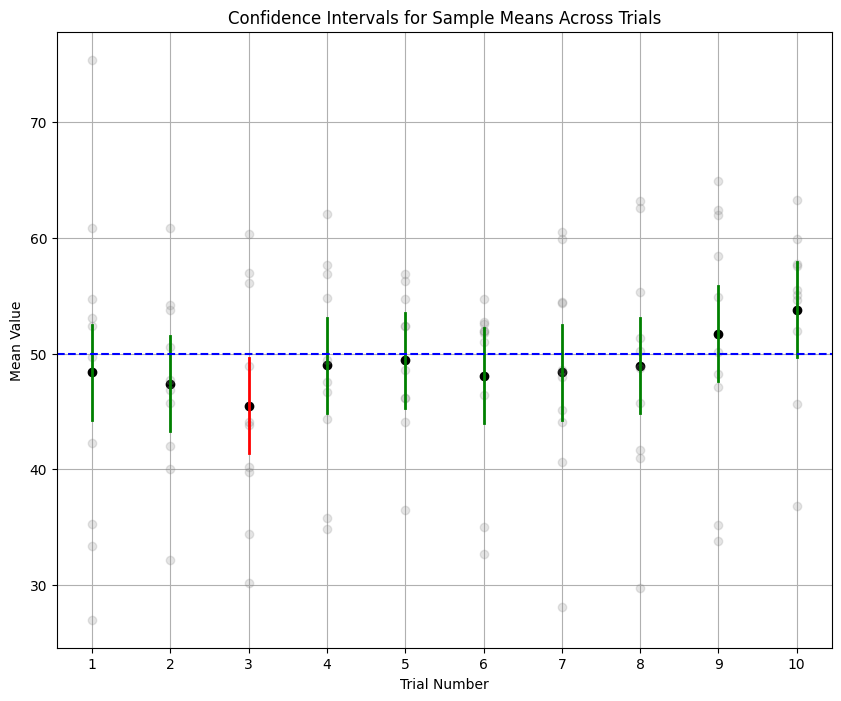

In [60]:
SAMPLE_SIZE = 10
CONFIDENCE_LEVEL = .1

def search(alpha, sample_size, spread):
    d = 3
    epsilon = .0001
    delta = 1 * 10 ** (-d)
    i = 45
    while i < 55:
        i += epsilon
        val = norm.cdf(i, loc=true_mean_age, scale=spread / (sample_size ** (1/2))) # alternative to math is to simulate this every time...
        if abs(alpha - val) < delta:
            return round(i, ndigits=d-2)
    ValueError("couldn't find anything")

def confidence_width(conf_level, sample_size, spread):
    sample_avg_age = search(conf_level, sample_size, spread)
    return true_mean_age - sample_avg_age

plt.figure(figsize=(10, 8))
width = confidence_width(CONFIDENCE_LEVEL, SAMPLE_SIZE, true_stdev_age)
print(width)
for i in range(10):
    sample_ages = true_mean_age + np.random.randn(SAMPLE_SIZE) * true_stdev_age
    sample_mean = np.mean(sample_ages)
    
    ci_lower = sample_mean - width
    ci_upper = sample_mean + width

    contains_true_mean = ci_lower <= true_mean_age <= ci_upper
    ci_color = 'green' if contains_true_mean else 'red'
    
    plt.plot(i + 1, sample_mean, 'o', color='black')
    plt.plot(np.ones_like(sample_ages) + i, sample_ages, 'o', color='grey', alpha=.2)
    plt.plot([i + 1, i + 1], [ci_lower, ci_upper], color=ci_color, linewidth=2)

plt.axhline(y=true_mean_age, color='blue', linestyle='--', label='True Mean')

plt.xticks(range(1, 10 + 1))
plt.xlabel("Trial Number")
plt.ylabel("Mean Value")
plt.title("Confidence Intervals for Sample Means Across Trials")
plt.grid(True)
plt.show()

Let's do this with an even simpler dataset. Let's say we have a random variable X that follows a standard normal distribution. What interval, centered around X would contain 0 50% of the time? 

In [45]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

TRIALS = 1000
count = 0
for _ in range(TRIALS):
    X = np.random.randn()
    ci_lower = X - 2.327
    ci_upper = X + 2.327
    if ci_lower < 0 and ci_upper > 0:
        count += 1

print(count / TRIALS)


0.983


Let's search for this value

In [51]:

def search(alpha):
    d = 3
    epsilon = .0001
    delta = 1 * 10 ** (-d)
    i = 45
    while i < 55:
        i += epsilon
        val = norm.cdf(i, loc=true_mean_age, scale=true_stdev_age / (SAMPLE_SIZE ** (1/2))) # alternative to math is to simulate this every time...
        if abs(alpha - val) < delta:
            return round(i, ndigits=d-2)
    ValueError("couldn't find anything")

t_alpha = search(.01)
print(t_alpha)

47.6


## The importance of the independence assumption

                            OLS Regression Results                            
Dep. Variable:                   time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.832e+04
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           3.49e-68
Time:                        09:58:29   Log-Likelihood:                -55.683
No. Observations:                  50   AIC:                             115.4
Df Residuals:                      48   BIC:                             119.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2847      0.230     -5.591      0.0

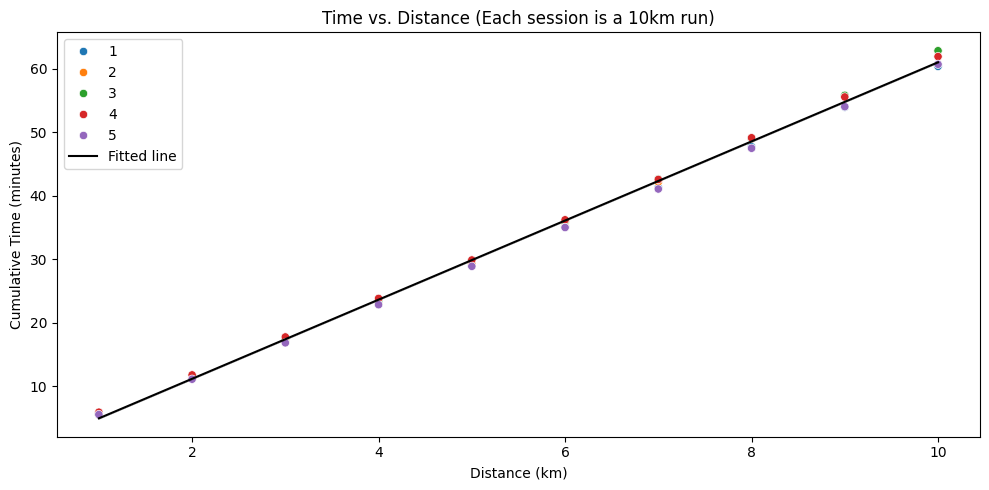

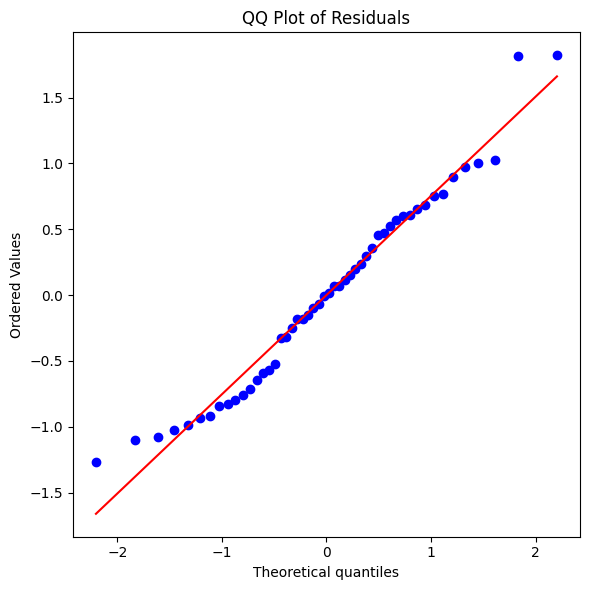

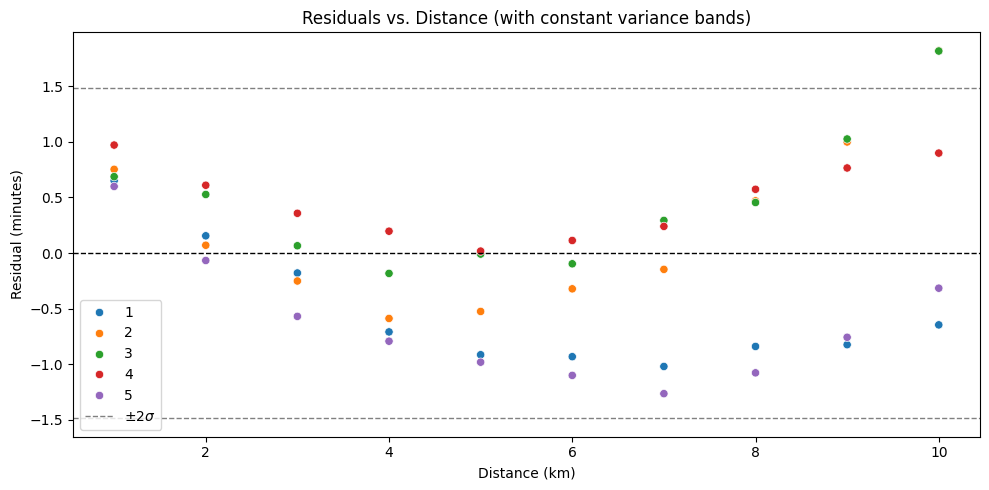

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
from statsmodels.stats.diagnostic import acorr_ljungbox

# Seed for reproducibility
np.random.seed(42)

# Simulate 5 sessions of 10km runs, with 1km splits
num_sessions = 5
km_splits = np.arange(1, 11)  # km 1 to 10

# Each session has a base pace and a slight pacing trend across the 10km
session_pace_base = np.random.normal(loc=5.5, scale=0.2, size=num_sessions)
session_pace_slope = np.random.normal(loc=0.05, scale=0.02, size=num_sessions)

# Generate time data with slightly linear residual patterns across sessions
data = []
for session_id in range(num_sessions):
    base = session_pace_base[session_id]
    slope = session_pace_slope[session_id]
    for km in km_splits:
        pace = base + slope * km
        time = pace * km + np.random.normal(0, 0.1)  # cumulative time
        data.append((session_id + 1, km, time))

df = pd.DataFrame(data, columns=["session", "distance", "time"])

# Fit linear regression
X = add_constant(df["distance"])
model = OLS(df["time"], X).fit()
df["fitted"] = model.fittedvalues
df["residuals"] = model.resid

# Print regression summary
print(model.summary())

# Ljung-Box test for autocorrelation
ljung_box_result = acorr_ljungbox(df["residuals"], lags=[5], return_df=True)
print("\nLjung-Box test result:")
print(ljung_box_result)

# --- PLOTS ---

# 1. Distance vs Time
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="distance", y="time", hue="session", palette="tab10")
sns.lineplot(x=df["distance"], y=df["fitted"], color="black", label="Fitted line")
plt.title("Time vs. Distance (Each session is a 10km run)")
plt.xlabel("Distance (km)")
plt.ylabel("Cumulative Time (minutes)")
plt.legend()
plt.tight_layout()
plt.show()

# 2. QQ plot for residuals
plt.figure(figsize=(6, 6))
stats.probplot(df["residuals"], dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# 3. Residuals vs Distance with ±2σ bands
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="distance", y="residuals", hue="session", palette="tab10")

resid_std = df["residuals"].std()
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.axhline(2 * resid_std, color="gray", linestyle="--", linewidth=1, label=r'$\pm 2\sigma$')
plt.axhline(-2 * resid_std, color="gray", linestyle="--", linewidth=1)

plt.title("Residuals vs. Distance (with constant variance bands)")
plt.xlabel("Distance (km)")
plt.ylabel("Residual (minutes)")
plt.legend()
plt.tight_layout()
plt.show()
